# 형태학적 변환

형태학적 변환(morphological transformation)은 영상 분야에서 노이즈 제거, 구멍 메꾸기, 연결되지 않은 경계 이어붙이기 등 형태학적 관점에서 영상 연산을 뜻한다. 모폴로지는 주로 형태를 다루는 연산이므로 바이너리 이미지를 대상으로 하고 대표적인 연산은 침식과 팽창이다. 이 둘을 결합한 열림과 닫힘 연산이 있다.

## 침식 연산

침식(erosion)은 원래 있던 객체의 영역을 깍아 내는 연산이다. 이 연산을 위해 구조화 요소(structuring element)라는 0과 1로 채워진 커널이 필요하며 1이 채어ㅜ진 모양에 따라 사각형, 타원형, 십자형 등을 사용할 수 있다. 침식 연산은 구조화 요소 커널을 입력 영상에 적용해서 1로 채워진 영역을 온전히 올려 놓을 수 없으며 해당 픽셀을 0으로 변경한다. 

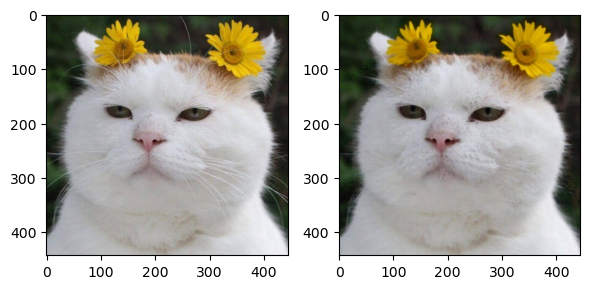

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
erosion = cv2.erode(img, kernel)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(img)
ax2.imshow(erosion)
fig.tight_layout()
plt.show()

## 팽창 연산

팽창(dilatation)은 침식과 반대로 영상 속 사물의 주변을 덧붙여서 영역을 확장하는 연산이다. 침식 연산과 마찬가지로 구조화 요소 커널을 입력 영상에 적용해 1로 채워진 영역이 온전히 덮이지 않으면 1로 채워넣는다.

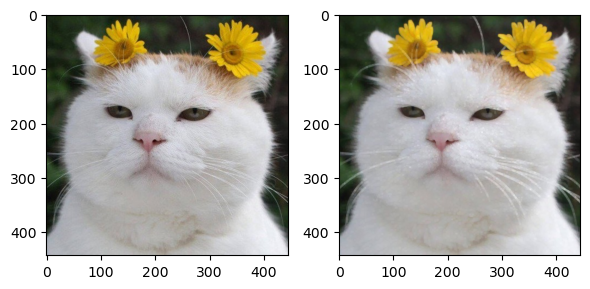

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst = cv2.dilate(img, kernel)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(img)
ax2.imshow(dst)
fig.tight_layout()
plt.show()

(<AxesSubplot:title={'center':'Morphological edges (size 3)'}>,
 (-0.5, 443.5, 442.5, -0.5),
 Text(0.5, 1.0, 'Morphological edges (size 3)'))

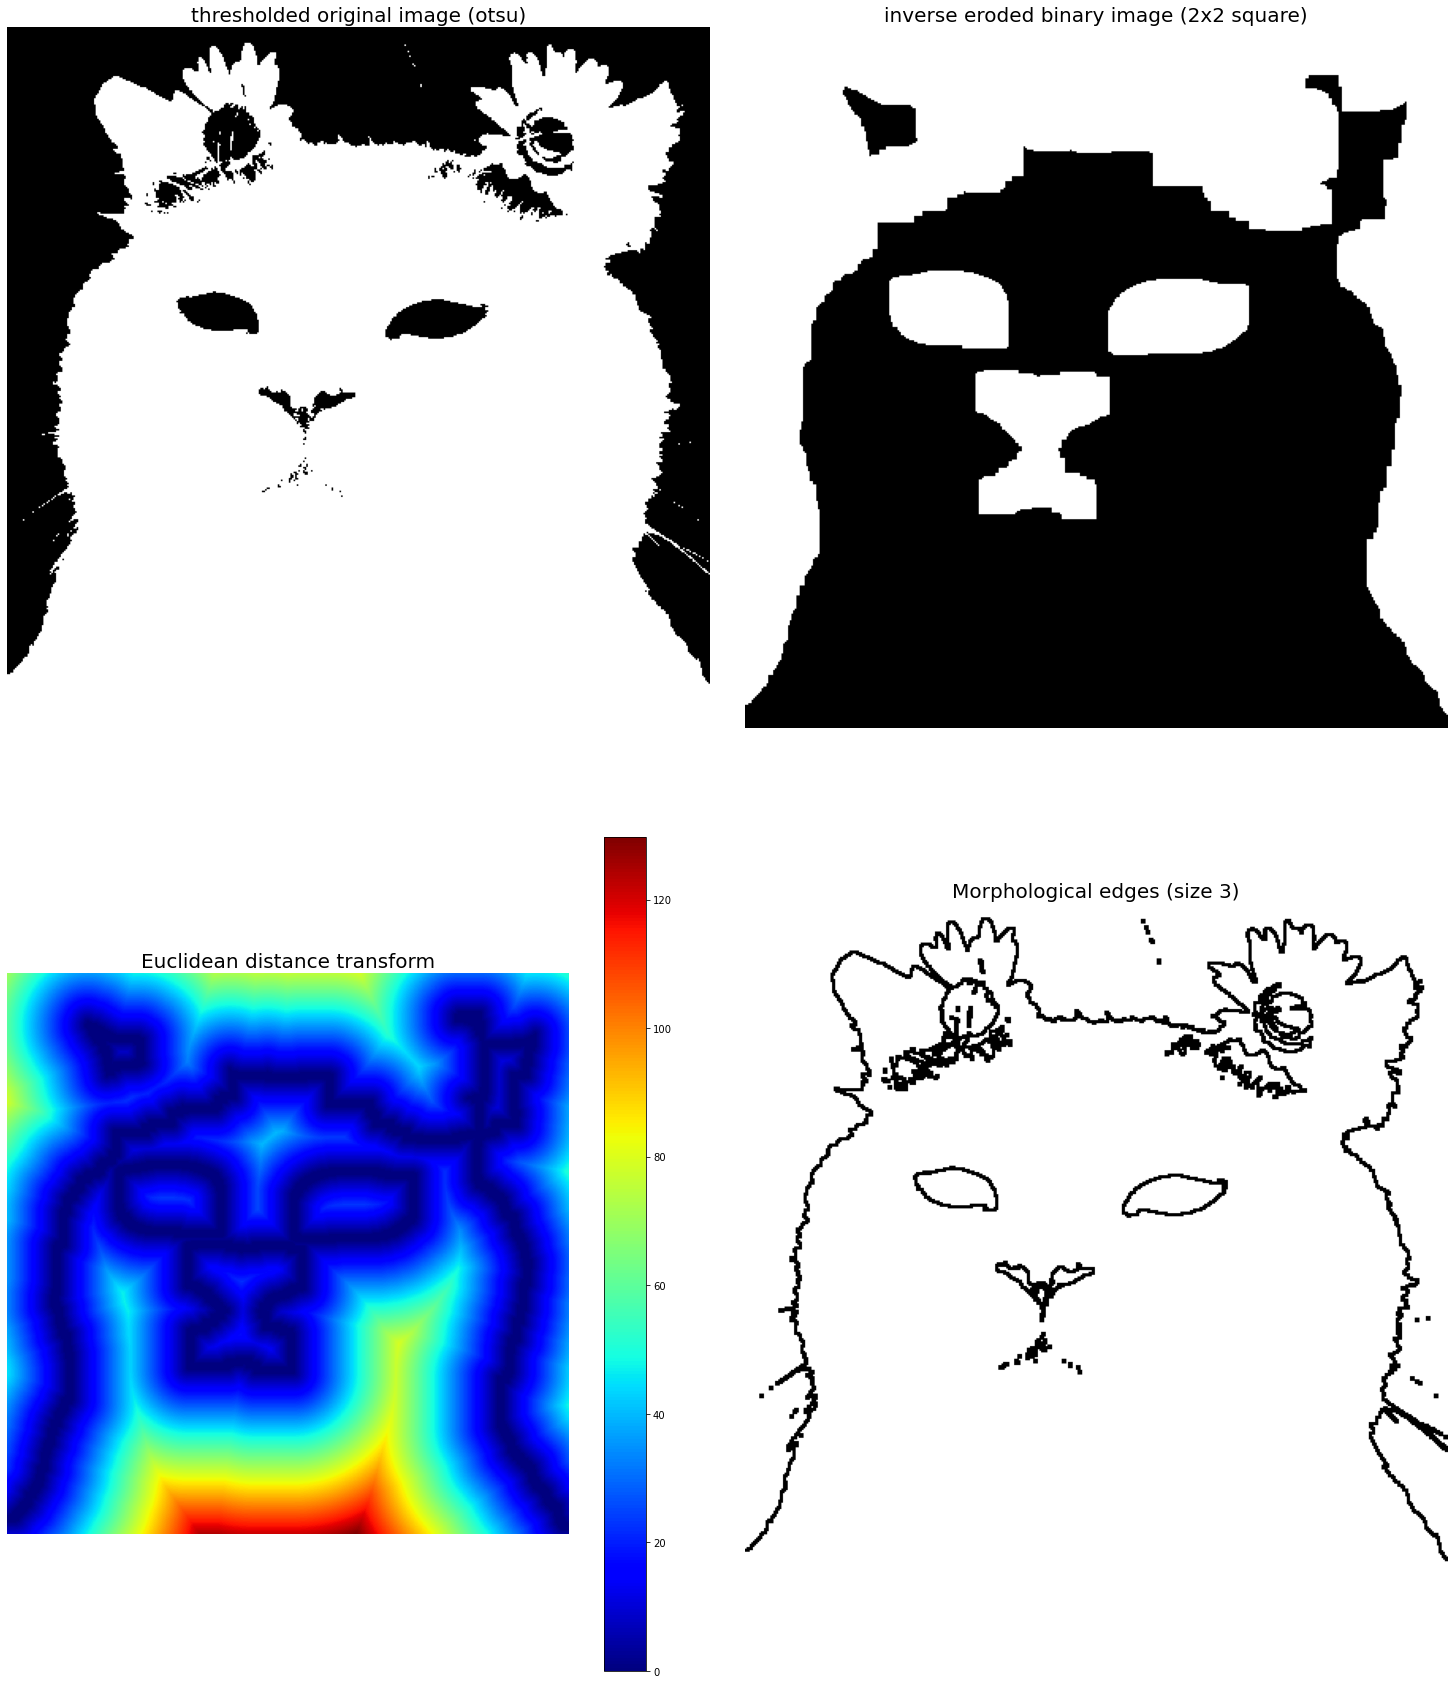

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_fill_holes, morphological_gradient, distance_transform_edt
import numpy as np
import matplotlib.pylab as plt

im = rgb2gray(imread('./img/cat-01.jpg'))
thres = threshold_otsu(im)
im = (im > thres).astype(np.uint8)

eroded = binary_erosion(im, structure=np.ones((2,2)), iterations=20)[20:,20:]
eroded = 1 - eroded
dilated = binary_dilation(eroded, structure=np.ones((11,11)))
edges = 1 - morphological_gradient(im, size=3) #dilated5.astype(np.int) - eroded5.astype(np.int)
boundary = np.clip(dilated.astype(np.int) - eroded.astype(np.int), 0, 1)
dt = distance_transform_edt(np.logical_not(boundary))

plt.figure(figsize=(20,25))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('thresholded original image (otsu)', size=20)
plt.subplot(222), plt.imshow(eroded), plt.axis('off'), plt.title('inverse eroded binary image (2x2 square)', size=20)
plt.subplot(223), plt.imshow(dt, cmap='jet'), plt.axis('off'), plt.title('Euclidean distance transform', size=20), plt.colorbar()
plt.subplot(224), plt.imshow(edges), plt.axis('off'), plt.title('Morphological edges (size 3)', size=20)

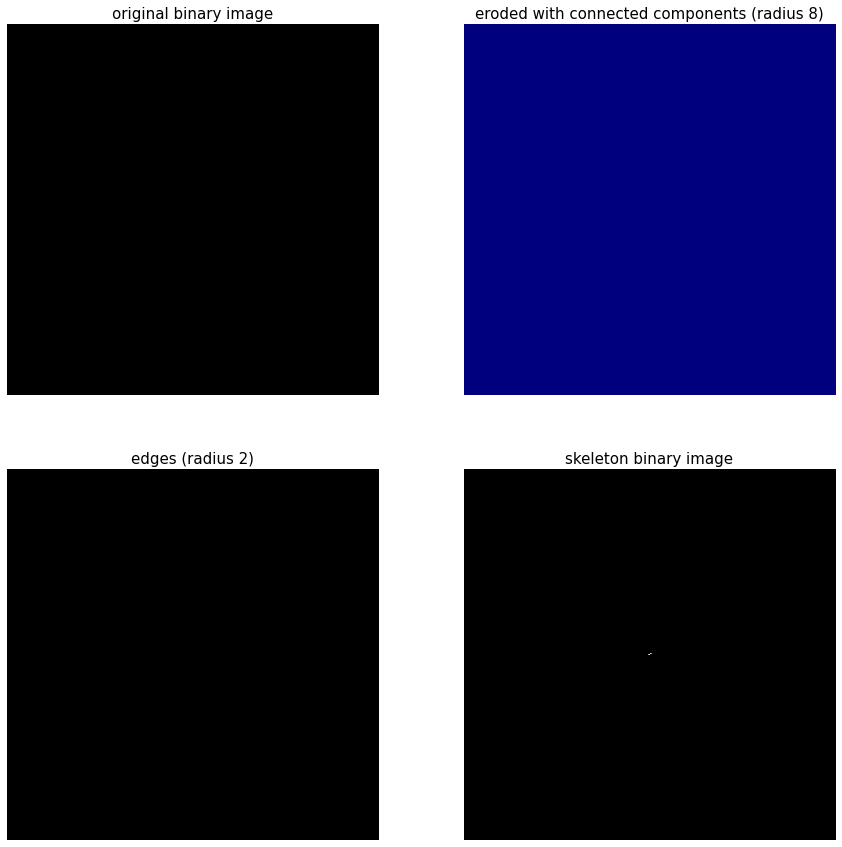

In [5]:
from skimage import morphology as morph
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

im = rgb2gray(imread('./img/cat-01.jpg'))
im = (im > 0).astype(np.uint8)

disk2 = morph.disk(radius=2)
disk8 = morph.disk(radius=8)

eroded2 = morph.binary_erosion(im, selem=disk2)
eroded8 = morph.binary_erosion(im, selem=disk8)
labeled = morph.label(eroded8, connectivity=1)
dilated2 = morph.binary_dilation(im, selem=disk2)
edges = dilated2.astype(np.int) - eroded2.astype(np.int)

skeleton = morph.skeletonize(im)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('original binary image', size=15)
plt.subplot(222), plt.imshow(labeled, cmap='jet'), plt.axis('off'), plt.title('eroded with connected components (radius 8)', size=15)
plt.subplot(223), plt.imshow(edges), plt.axis('off'), plt.title('edges (radius 2)', size=15)
plt.subplot(224), plt.imshow(skeleton), plt.axis('off'), plt.title('skeleton binary image', size=15)
plt.show()

In [ ]:
from skimage.morphology import rectangle
orig = imread('images/tetris.png')
im = rgb2gray(orig)
im = (im < 1).astype(np.uint8)

eroded = binary_erosion(im, square(21))
eroded2 = binary_erosion(im, rectangle(41,20))

plt.figure(figsize=(20,20))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(141), plt.imshow(orig), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(142), plt.imshow(im), plt.axis('off'), plt.title('thresholded image', size=20)
plt.subplot(143), plt.imshow(eroded), plt.axis('off'), plt.title('eroded (21x21 SE)', size=20)
plt.subplot(144), plt.imshow(eroded2), plt.axis('off'), plt.title('eroded (41x20 SE)', size=20)
plt.show()

In [ ]:
from skimage.morphology import diamond
orig = imread('images/card.png')
im = rgb2gray(orig)
im = (im < 1).astype(np.uint8)

eroded = binary_erosion(im, diamond(21))
eroded2 = binary_erosion(im, diamond(41))

plt.figure(figsize=(20,20))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(141), plt.imshow(orig), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(142), plt.imshow(im), plt.axis('off'), plt.title('thresholded image', size=20)
plt.subplot(143), plt.imshow(eroded), plt.axis('off'), plt.title('eroded (21x21 SE)', size=20)
plt.subplot(144), plt.imshow(eroded2), plt.axis('off'), plt.title('eroded (41x20 SE)', size=20)
plt.show()

In [ ]:
from skimage.morphology import disk, rectangle
im = rgb2gray(imread('images/points_with_lines.png'))
th = threshold_otsu(im)
im = (im >= th).astype(np.uint8)
eroded1 = binary_erosion(im, disk(5))
eroded2 = binary_erosion(im, rectangle(20, 1))
eroded3 = binary_erosion(im, rectangle(1, 20))

plt.figure(figsize=(20,17))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('binary image', size=20)
plt.subplot(222), plt.imshow(eroded1), plt.axis('off'), plt.title('points', size=20)
plt.subplot(223), plt.imshow(eroded2), plt.axis('off'), plt.title('vertical lines', size=20)
plt.subplot(224), plt.imshow(eroded3), plt.axis('off'), plt.title('horizontal lines', size=20)
plt.show()

In [ ]:
from skimage.morphology import disk, square, black_tophat, white_tophat
im = rgb2gray(imread('images/mri.png'))
eroded1 = black_tophat(im, disk(20))
eroded2 = black_tophat(im, square(50))
eroded3 = white_tophat(im, square(50))

plt.figure(figsize=(15,17))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('MRI image', size=20)
plt.subplot(222), plt.imshow(eroded1), plt.axis('off'), plt.title('black top hat (small SE)', size=20)
plt.subplot(223), plt.imshow(eroded2), plt.axis('off'), plt.title('black top hat (large SE)', size=20)
plt.subplot(224), plt.imshow(eroded3), plt.axis('off'), plt.title('white top hat', size=20)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('images/circles.png', 0)
image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((11,11),np.uint8)
eroded1 = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel) 

kernel = np.ones((21,21),np.uint8)
eroded = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel) 

cnts, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)

count = 0
for c in cnts:
    cv2.drawContours(output, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)   
    count += 1
    
text = "Found {} objects".format(count)
plt.figure(figsize=(15,16))
plt.gray()
plt.subplot(221), plt.imshow(image), plt.axis('off'), plt.title('Original binary image', size=20)
plt.subplot(222), plt.imshow(eroded1), plt.axis('off'), plt.title('Eroded (11x11 square)', size=20)
plt.subplot(223), plt.imshow(eroded), plt.axis('off'), plt.title('Eroded (21x21 square)', size=20)
plt.subplot(224), plt.imshow(output), plt.axis('off'), plt.title('Counting objects: ' + text, size=20)
plt.show()

In [ ]:
import cv2
image = cv2.imread('images/rasagolla.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray) #255 - gray
#gray = cv2.equalizeHist(gray)

edged = cv2.Canny(gray, 50, 150)
thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((4,4),np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #Close
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)  #Open

#ret, thres = cv2.threshold(edged,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

count = 0
# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 2px random color
    # outline, then display the output contours one at a time
    #print(cv2.contourArea(c))
    if cv2.contourArea(c) > 5: # ignore small objects
        cv2.drawContours(output, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)   
        count += 1
    
text = "Found {} objects".format(count)
plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(222), plt.imshow(edged, cmap='gray'), plt.axis('off'), plt.title('Edges', size=20)
plt.subplot(223), plt.imshow(thresh, cmap='gray'), plt.axis('off'), plt.title('Binary image', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Counting objects: ' + text, size=20)
plt.show()

In [ ]:
import mahotas as mh
import matplotlib.pylab as plt
import numpy as np
from skimage.morphology import flood_fill, diameter_closing
blackhole = mh.imread('images/blackhole.png')
blackhole_gray = mh.colors.rgb2grey(blackhole).astype(np.uint8)
t = 60 #mahotas.rc(blackhole_gray)   
bin_blackhole = (blackhole_gray > t).astype(np.uint8)
cms = mh.center_of_mass(bin_blackhole)
print('Eccentricity =', mh.features.eccentricity(bin_blackhole))
# 0.5449847073316407
plt.figure(figsize=(12,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.05)
plt.subplot(221), plt.imshow(blackhole), plt.axis('off'), plt.title('original black hole image', size=20)
#bin_blackhole = mahotas.border(bin_blackhole)
plt.subplot(222), plt.imshow(bin_blackhole), plt.axis('off'), plt.title('binary image (with center of mass)\nEuler Number={}'.format(mh.euler(bin_blackhole)), size=20)
plt.scatter(cms[1], cms[0], color='red', s=50)
bin_blackhole2 = flood_fill(bin_blackhole, (200,400), 1)
plt.subplot(223), plt.imshow(bin_blackhole2), plt.axis('off'), plt.title('binary image (after flood-fill)\nEuler Number={}'.format(mh.euler(bin_blackhole2)), size=20)
plt.subplot(224), plt.imshow(diameter_closing(bin_blackhole, 100, connectivity=2)), plt.axis('off'), plt.title('binary image (after diameter-closing)', size=20)
plt.show()

In [ ]:
import mahotas as mh
import matplotlib.pylab as plt
import numpy as np
from skimage.morphology import diameter_opening
planets = mh.imread('images/planets.png')
planets_gray = mh.colors.rgb2grey(planets).astype(np.uint8)
t = 25 #mahotas.rc(planets_gray)   
bin_planets = (planets_gray > t).astype(np.uint8)
cms = mh.center_of_mass(bin_planets)
#print(cms)
print('Euler number =', mh.euler(bin_planets))
print('Eccentricity =', mh.features.eccentricity(bin_planets))
plt.figure(figsize=(12,10))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.05)
plt.subplot(221), plt.imshow(planets), plt.axis('off'), plt.title('original planets image', size=20)
#bin_blackhole = mahotas.border(bin_blackhole)
plt.subplot(222), plt.imshow(bin_planets), plt.axis('off'), plt.title('binary image (with center of mass)', size=20)
plt.scatter(cms[1], cms[0], color='red', s=50)
plt.subplot(223), plt.imshow(diameter_opening(bin_planets, 10, connectivity=2)), plt.axis('off'), plt.title('binary image (after diameter-opening)', size=20)
plt.subplot(224), plt.imshow(diameter_opening(bin_planets, 100, connectivity=2)), plt.axis('off'), plt.title('binary image (after diameter-opening)', size=20)
plt.show()

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import reconstruction
from skimage.morphology import binary_erosion, rectangle
import matplotlib.pylab as plt
import numpy as np
img = rgb2gray(imread('images/tagore_manuscript.png'))
th = 0.6 #threshold_otsu(img)
img[img <= th] = 0
img[img > th] = 1
img = 1 - img
mask = img
seed = binary_erosion(img, rectangle(1,50))
words = reconstruction(seed, mask, 'dilation')
plt.figure(figsize=(15,20))
plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('Tagore\'s drawing-ridden manuscript', size=20)
plt.subplot(222), plt.imshow(seed), plt.axis('off'), plt.title('Seed for the reconstruction', size=20)
plt.subplot(223), plt.imshow(words), plt.axis('off'), plt.title('Tagore\'s drawing', size=20)
plt.subplot(224), plt.imshow(img-words), plt.axis('off'), plt.title('Tagore\'s manuscript without drawing', size=20)
plt.show()

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import reconstruction
from skimage.morphology import binary_erosion, rectangle, remove_small_objects, remove_small_holes
import matplotlib.pylab as plt
import numpy as np
img = rgb2gray(imread('images/keyboard.png'))
th = 0.18 #threshold_otsu(img)
img[img <= th] = 0
img[img > th] = 1
img = remove_small_holes(255*img.astype(np.uint8), 256)
mask = img
seed = binary_erosion(img, rectangle(30,1))
words = reconstruction(seed, mask, 'dilation')
plt.figure(figsize=(20,30))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.subplot(411), plt.imshow(img), plt.axis('off'), plt.title('Keyboard', size=20)
plt.subplot(412), plt.imshow(seed), plt.axis('off'), plt.title('Seed for the reconstruction', size=20)
plt.subplot(413), plt.imshow(words), plt.axis('off'), plt.title('Keyboard without alphabets (with reconstruction)', size=20)
plt.subplot(414), plt.imshow(remove_small_objects((img-words).astype(np.uint8), 20)), plt.axis('off'), plt.title('Only alphabets', size=20)
plt.show()  

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from scipy import ndimage

def hit_or_miss_transform(im, s1, s2):
    im = rgb2gray(imread(im))
    m, n = im.shape
    s1 = rgb2gray(imread(s1))
    s2 = rgb2gray(imread(s2))
    print(im.shape, s1.shape, s2.shape)
    plt.gray()
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(s1), plt.axis('off'), plt.title('Structuring element 1', size=20)
    plt.subplot(122), plt.imshow(s2), plt.axis('off'), plt.title('Structuring element 2', size=20)
    plt.show()
    hom_transformed = ndimage.binary_hit_or_miss(im, structure1=s1, structure2=s2).astype(np.int)
    xs, ys = np.where(hom_transformed == 1)
    hom_transformed = gray2rgb(hom_transformed)
    w, h = 10, 12 #s1.shape
    #print(w,h,m,n)
    for i in range(len(xs)):
        x, y = (xs[i], ys[i])
        for j in range(max(0, x-h), min(m-1, x+h)):
            for k in range(max(0, y-w), min(n, y+w)):
                hom_transformed[j, k, 0] = 1.
        for j in range(max(0, x-h), min(m, x+h)):
            for k in range(max(0, y-w), min(n-1, y+w)):
                hom_transformed[j, k, 0] = 1.
    #np.max(hom_transformed)
    plt.figure(figsize=(30,60))
    #plt.imshow(hom_transformed.astype(np.float))
    plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original Image', size=25)
    plt.subplot(122), plt.imshow(np.clip(gray2rgb(im) + hom_transformed.astype(np.float), 0, 1)), plt.axis('off'), 
    plt.title('Output with Hit-or-Miss Transform', size=25)
    plt.show()

hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_1.png') 
hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_2.png') 

In [ ]:
def hit_or_miss_transform2(im, s1, s2, ch):
    m, n = im.shape
    hom_transformed = ndimage.binary_hit_or_miss(im, structure1=s1, structure2=s2).astype(np.uint8)
    xs, ys = np.where(hom_transformed == 1)
    hom_transformed = gray2rgb(hom_transformed)
    w, h = 18, 12 #s1.shape
    for i in range(len(xs)):
        x, y = (xs[i], ys[i])
        for j in range(max(0, x-h), min(m-1, x+h)):
            for k in range(max(0, y-w), min(n, y+w)):
                hom_transformed[j, k, ch] = 1.
        for j in range(max(0, x-h), min(m, x+h)):
            for k in range(max(0, y-w), min(n-1, y+w)):
                hom_transformed[j, k, ch] = 1.
    return hom_transformed
    
im = rgb2gray(imread('images/triglyceride.png'))
s1 = rgb2gray(imread('images/tg_se1.png'))
s2 = rgb2gray(imread('images/tg_se2.png'))
s3 = rgb2gray(imread('images/tg_se3.png'))
pat1 = hit_or_miss_transform2(im, s1, s2, 0) 
pat2 = hit_or_miss_transform2(im, s1, s3, 2) 
plt.figure(figsize=(20,10))
plt.imshow(np.clip(gray2rgb(im) + pat1.astype(np.float) + pat2.astype(np.float), 0, 1)), plt.axis('off') 
plt.title('Output with Hit-or-Miss Transform', size=25)
plt.show()

In [ ]:
from scipy import ndimage as ndi
from skimage.morphology import watershed, disk, binary_dilation, remove_small_objects
from skimage.filters import rank, threshold_otsu
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

image = img_as_ubyte(rgb2gray(imread('images/circles.png'))) #img_as_ubyte(data.camera())
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)
labels = remove_small_objects(labels, min_size=100)
props = regionprops(labels)
print(len(np.unique(labels)), len(props))

plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(image), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(222), plt.imshow(distance), plt.axis('off'), plt.title('Distance', size=20)
plt.subplot(223), plt.imshow(binary_dilation(markers, disk(2))), plt.axis('off'), plt.title('Markers', size=20)
plt.subplot(224), plt.imshow(labels, cmap='jet'), plt.axis('off'), plt.title('Segmented', size=20)
plt.show()

image = img_as_ubyte(rgb2gray(imread('images/lotus.png')))
denoised = rank.median(image, disk(2))
# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 20
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

labels = watershed(gradient, markers)
labels = remove_small_objects(labels, min_size=100)
props = regionprops(labels)
print(len(np.unique(labels)), len(props))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original", size=20)

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient", size=20)

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers", size=20)

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented", size=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

# Get information regarding the shape of the image. 
im_shape = np.shape(gradient)
x = np.arange(0, im_shape[0], 1)
y = np.arange(0, im_shape[1], 1)

# Make a grid 
x, y = np.meshgrid(x, y)

# Do the 3D plot.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x, y, np.transpose(gradient), cmap='inferno')
plt.xlim([0, im_shape[0]])
plt.ylim([0, im_shape[1]])

# Rotate and tilt the plot so peaks and valleys are obvious
ax.view_init(75, 360)

In [ ]:
from skimage.morphology import watershed, binary_erosion, remove_small_objects, square 
from scipy.ndimage import distance_transform_edt
from skimage.feature import peak_local_max
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border

def segment_with_watershed(im, cell_thresh, bg_thresh):
    
    if np.max(im) != 1.0:
        im = (im - im.min()) / (im.max() - im.min())
    
    im_mask = im < cell_thresh
    
    # Generate the catchment basins. 
    basins = np.zeros_like(im)
    basins[im < cell_thresh] = 2
    basins[im > bg_thresh] = 1

    # Peform the watershed by flooding. 
    flood_seg = watershed(im , basins)
    flood_seg = flood_seg > 1.0
    
    # Now erode the boundaries and compute the distance transform. 
    selem = square(3)
    flood_erode = binary_erosion(flood_seg, selem=selem)
    flood_seg = clear_border(flood_seg, buffer_size=10)
    
    # Compute the distance matrix
    distances = distance_transform_edt(flood_seg)
     
    # Find the maxima
    local_max = peak_local_max(
        distances, indices=False, footprint=None, labels=flood_seg,
        min_distance=1)
    max_lab = label(local_max)

    # Perform the topological watershed. 
    final_seg = watershed(-distances, max_lab, mask=flood_seg)

    # Remove any stray crap. 
    final_seg = remove_small_objects(final_seg, min_size=100)

    # Extract the region properties. 
    props = regionprops(final_seg)
    
    # Determine the number of cells. 
    num_cells = len(props)

    return final_seg, distances, basins, num_cells  

image = img_as_ubyte(rgb2gray(imread('images/sunflowers.png')))
image = rank.median(image, disk(2))

labels, distances, markers, nseg = segment_with_watershed(image, 0.25, 0.28)
print(nseg)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original", size=20)

ax[1].imshow(distances, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title("Distances", size=20)

im = ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
#plt.colorbar(im, ax=ax[2])
ax[2].set_title("Markers", size=20)

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7) 
ax[3].set_title("Blobs Detected with Morphological Watershed", size=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
from skimage.feature import blob_log
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

#image = img_as_ubyte(rgb2gray(imread('images/sunflowers.png')))
#image = rank.median(image, disk(2))

blobs_log = blob_log(np.invert(image), max_sigma=40, num_sigma=10, threshold=.2)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), sharex=True, sharey=True)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.02, hspace=0.02)

axes[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title("Original", size=20)

axes[1].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    if np.pi*r**2 > 150:
        c = plt.Circle((x, y), r, color=[0.75]+np.random.rand(2).tolist(), linewidth=2, fill=True, alpha=.7)
        axes[1].add_patch(c)
axes[1].set_title("Blobs Detected with LOG scale-space", size=20)

for a in axes:
    a.axis('off')

plt.show()